In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
trainingSet = pd.read_csv('Google_Stock_Price_Train.csv')
trainingSet = trainingSet.iloc[:, 1 : 2]

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
trainingSet = sc.fit_transform(trainingSet)

In [4]:
xTrain = trainingSet[:-1]
yTrain = trainingSet[1:]

In [5]:
xTrain = xTrain.reshape(1257, 1, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [7]:
model = Sequential()

In [8]:
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [9]:
model.add(Dense(units = 1))

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
model.fit(xTrain, yTrain, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 3s 2ms/step - loss: 0.0691
Epoch 2/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0596
Epoch 3/200
1257/1257 [==============================] - 0s 73us/step - loss: 0.0564
Epoch 4/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0540
Epoch 5/200
1257/1257 [==============================] - 0s 73us/step - loss: 0.0517
Epoch 6/200
1257/1257 [==============================] - 0s 73us/step - loss: 0.0493
Epoch 7/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.0470
Epoch 8/200
1257/1257 [==============================] - 0s 73us/step - loss: 0.0446
Epoch 9/200
1257/1257 [==============================] - 0s 73us/step - loss: 0.0422
Epoch 10/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.0397
Epoch 11/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.0372
Epoch 12/200
1257/1257 [==============================] - 0s 72u

1257/1257 [==============================] - 0s 73us/step - loss: 2.5363e-04
Epoch 94/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.5112e-04
Epoch 95/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.5511e-04
Epoch 96/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5577e-04
Epoch 97/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.5174e-04
Epoch 98/200
1257/1257 [==============================] - 0s 71us/step - loss: 2.5044e-04
Epoch 99/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5132e-04
Epoch 100/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5342e-04
Epoch 101/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5288e-04
Epoch 102/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.4987e-04
Epoch 103/200
1257/1257 [==============================] - 0s 71us/step - loss: 2.5031e-04
Epoch 104/200
1257/

1257/1257 [==============================] - 0s 71us/step - loss: 2.4937e-04
Epoch 184/200
1257/1257 [==============================] - 0s 71us/step - loss: 2.4552e-04
Epoch 185/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.4906e-04
Epoch 186/200
1257/1257 [==============================] - ETA: 0s - loss: 2.5581e-0 - 0s 72us/step - loss: 2.4740e-04
Epoch 187/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4910e-04
Epoch 188/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4812e-04
Epoch 189/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.4679e-04
Epoch 190/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5237e-04
Epoch 191/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.4681e-04
Epoch 192/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.4608e-04
Epoch 193/200
1257/1257 [==============================] - 0s 69us/step - lo

In [12]:
testSet = pd.read_csv('Google_Stock_Price_Test.csv')
realStockPrice = testSet.iloc[:, 1 : 2]

In [13]:
inputs = realStockPrice
inputs = sc.transform(inputs)
inputs = inputs.reshape(20, 1, 1)

In [14]:
predictedStockPrice = model.predict(inputs)
predictedStockPrice = sc.inverse_transform(predictedStockPrice)

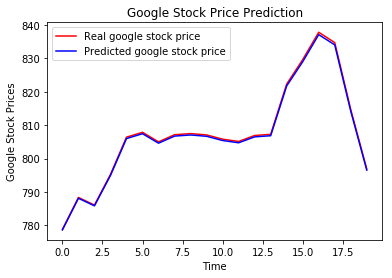

In [15]:
plt.plot(realStockPrice, color = 'red', label = 'Real google stock price')
plt.plot(predictedStockPrice, color = 'blue', label = 'Predicted google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()

In [21]:
realPricePredicted = model.predict(xTrain)
realPricePredicted = sc.inverse_transform(realPricePredicted)

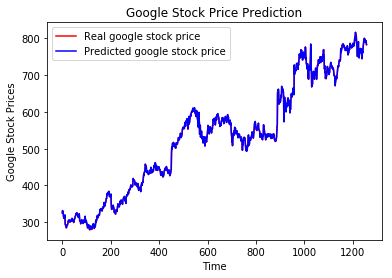

In [23]:
plt.plot(trainingSet, color = 'red', label = 'Real google stock price')
plt.plot(realPricePredicted, color = 'blue', label = 'Predicted google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()